In [1]:
from google.colab import files

# Cargar la imagen
uploaded = files.upload()

Saving Meme.jpg to Meme.jpg


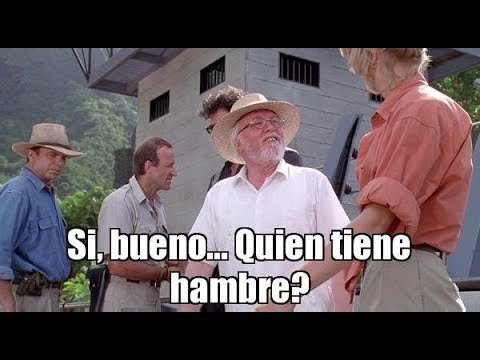

In [2]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread("/content/Meme.jpg")
cv2_imshow(img)

In [3]:
image = cv2.imread("/content/Meme.jpg")

# Ahora la imagen es un objeto que almacena todos los píxeles que constituyen la imagen
# Puedes simplemente imprimir la imagen para comprobar los valores de los píxeles
# También puedes imprimir los valores de tu imagen
height, width, channels = image.shape
print("La anchura de la imagen:", width)
print("La altura de la imagen:", height)
print("Número de canales:", channels)

La anchura de la imagen: 480
La altura de la imagen: 360
Número de canales: 3


In [4]:
!pip install rembg

#¡Para que la librería funcione correctamente, debemos especificar también una versión de librería dependiente!
!pip install Pillow==9.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 30.9 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


In [5]:
from rembg import remove

input_path = '/content/Meme.jpg'
output_path = '/content/Meme_sin_Bg.jpg'

with open(input_path, 'rb') as i:
    with open(output_path, 'wb') as o:
        input = i.read()
        output = remove(input)
        o.write(output)

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 116GB/s]


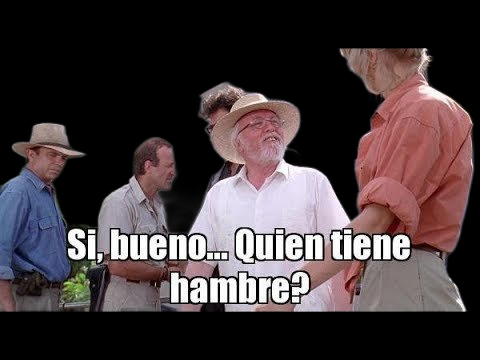

In [6]:
img = cv2.imread("/content/Meme_sin_Bg.jpg")
cv2_imshow(img)

In [7]:
import numpy as np

def change_back(background, img):
    """ Una función que reemplaza el fondo negro de las imágenes por otra imagen.
    Acepta dos argumentos: la imagen de fondo (background) y la propia imagen (img).
    La función comenzará desde la esquina superior izquierda de la imagen.
    Buscará todos los píxeles negros (con el valor 0) y los reemplazará por píxeles de la imagen de fondo."""

    x, y = 0, 0
    background = cv2.resize(background, (img.shape[1], img.shape[0]), interpolation = cv2.INTER_AREA)
    print(background.shape)
    res = np.copy(background)
    place = res[y: y + img.shape[0], x: x + img.shape[1]]
    a = img[..., -1].reshape((*img.shape[:-1], 1)).repeat(3, axis=2).astype('uint16')
    #a = img[..., -1].reshape((*img.shape[:-1], 1)).repeat(3, axis=2).astype('uint16')
    #a = img[..., 3:].repeat(3, axis=2).astype('uint16')
    place[...] = (place.astype('uint16') * (255 - a) // 255) + img[..., :3].astype('uint16') * a // 255
    return res

In [9]:
image = cv2.imread("/content/selva.jpg")

# Ahora la imagen es un objeto que almacena todos los píxeles que constituyen la imagen
# Puedes simplemente imprimir la imagen para comprobar los valores de los píxeles
# También puedes imprimir los valores de tu imagen
height, width, channels = image.shape
print("La anchura de la imagen:", width)
print("La altura de la imagen:", height)
print("Número de canales:", channels)

La anchura de la imagen: 1200
La altura de la imagen: 627
Número de canales: 3


In [10]:
image = cv2.imread("/content/Meme_sin_Bg.jpg")

# Ahora la imagen es un objeto que almacena todos los píxeles que constituyen la imagen
# Puedes simplemente imprimir la imagen para comprobar los valores de los píxeles
# También puedes imprimir los valores de tu imagen
height, width, channels = image.shape
print("La anchura de la imagen:", width)
print("La altura de la imagen:", height)
print("Número de canales:", channels)

La anchura de la imagen: 480
La altura de la imagen: 360
Número de canales: 3


(627, 1200, 3)


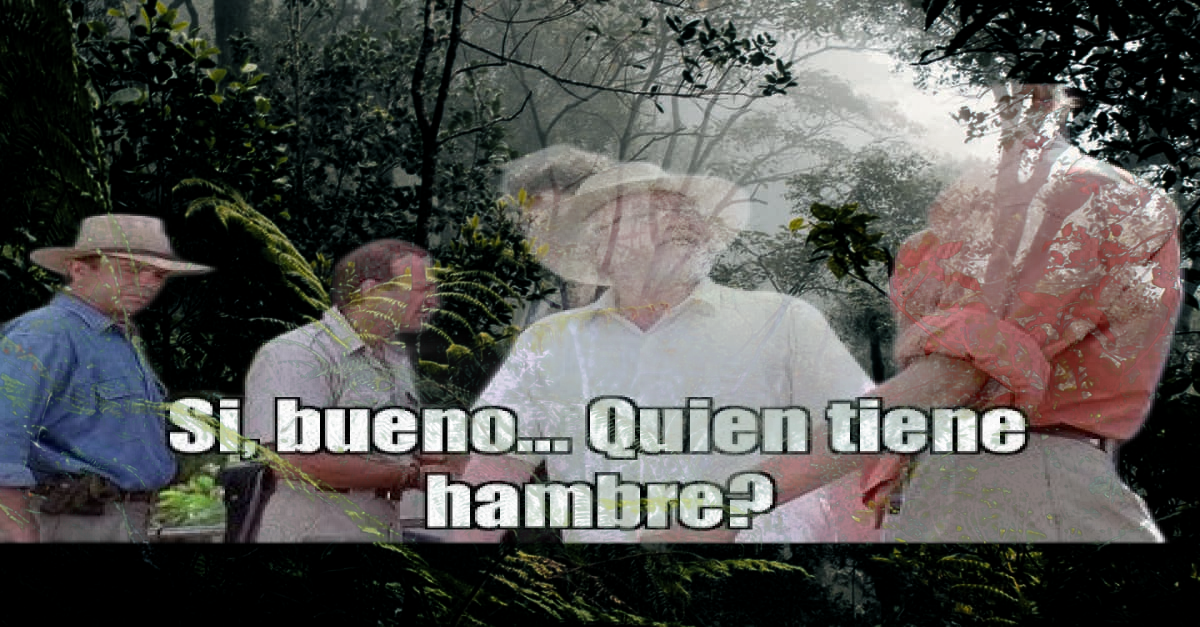

In [11]:
background = cv2.imread("/content/Meme_sin_Bg.jpg")
img = cv2.imread("/content/selva.jpg")
res = change_back(background, img)
cv2_imshow(res)

(700, 1200, 3)


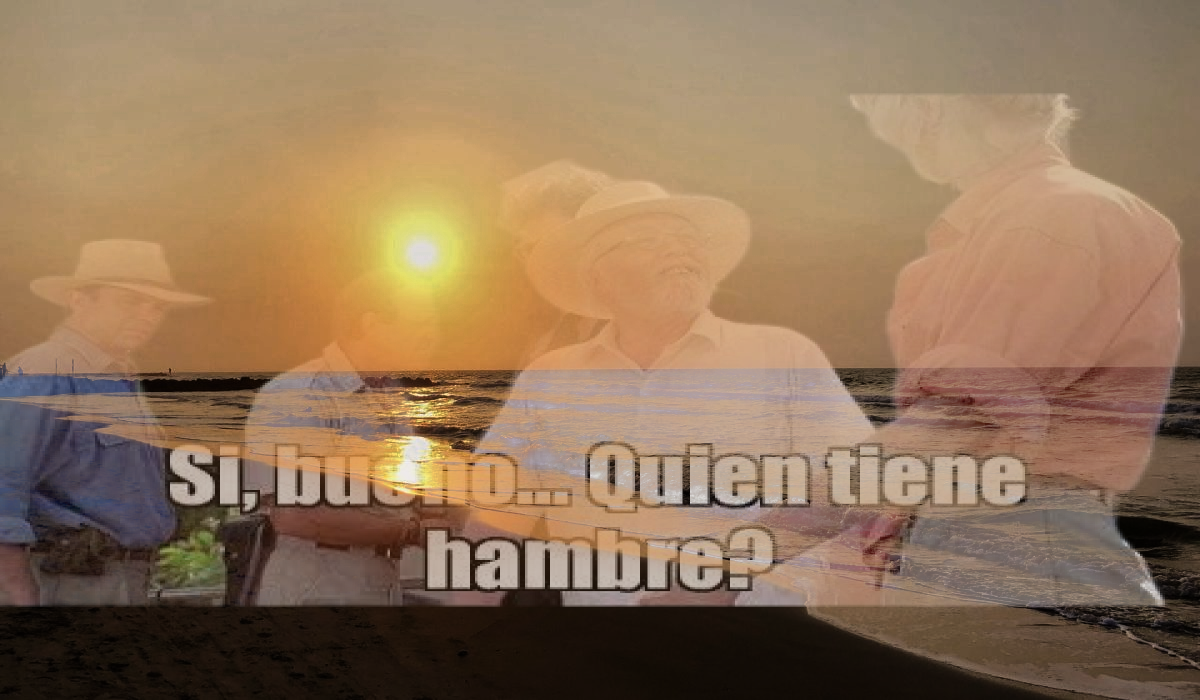

In [12]:
background = cv2.imread("/content/Meme_sin_Bg.jpg")
img = cv2.imread("/content/playa.jpg")
res = change_back(background, img)
cv2_imshow(res)

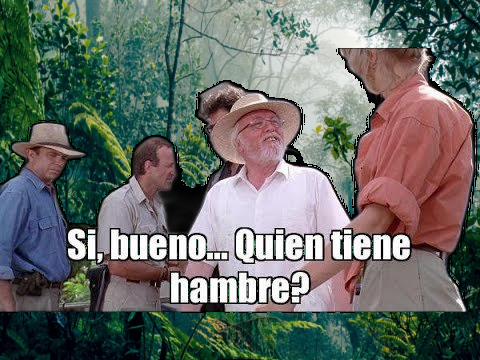

In [17]:
import cv2
import numpy as np

def change_back(background, img):
    """Una función que coloca la imagen original encima del fondo sin transparencia."""

    x, y = 0, 0
    background = cv2.resize(background, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_AREA)
    res = np.copy(background)

    # Máscara para identificar píxeles no negros en la imagen original
    mask = (img[..., :3] != [0, 0, 0]).any(axis=2)

    # Copiar píxeles no negros de la imagen original a la imagen de fondo
    res[y: y + img.shape[0], x: x + img.shape[1]][mask] = img[..., :3][mask]

    return res

# Ejemplo de uso:
background_image = cv2.imread("selva.jpg")
image_to_change = cv2.imread("Meme_sin_Bg.jpg")
result_image = change_back(background_image, image_to_change)
cv2_imshow(result_image)

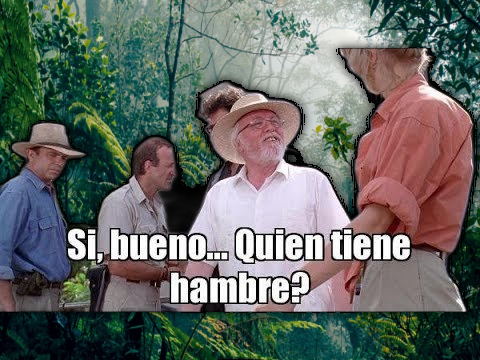

In [18]:
import cv2
import numpy as np

def change_back(background, img):
    """Una función que coloca la imagen original encima del fondo sin transparencia
    y mejora los bordes utilizando un suavizado gaussiano."""

    x, y = 0, 0
    background = cv2.resize(background, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_AREA)
    res = np.copy(background)

    # Máscara para identificar píxeles no negros en la imagen original
    mask = (img[..., :3] != [0, 0, 0]).any(axis=2)

    # Copiar píxeles no negros de la imagen original a la imagen de fondo
    res[y: y + img.shape[0], x: x + img.shape[1]][mask] = img[..., :3][mask]

    # Aplicar suavizado gaussiano a los bordes de la región copiada
    blurred_mask = cv2.GaussianBlur(mask.astype(float), (0, 0), sigmaX=5, sigmaY=5)
    blurred_mask = np.stack([blurred_mask] * 3, axis=-1)  # Para que tenga la misma forma que la imagen

    # Mezclar la imagen original con el fondo usando la máscara suavizada
    res[y: y + img.shape[0], x: x + img.shape[1]] = (res[y: y + img.shape[0], x: x + img.shape[1]] * (1 - blurred_mask) +
                                                     img[..., :3] * blurred_mask).astype('uint8')

    return res

# Ejemplo de uso:
background_image = cv2.imread("selva.jpg")
image_to_change = cv2.imread("Meme_sin_Bg.jpg")
result_image = change_back(background_image, image_to_change)
cv2_imshow(result_image)